# *Importing libaries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px


In [2]:
clothes_csv="D:\\clothes_reviews\\Data\\clothes.csv"

# Data preprocessing

In [3]:
dm=pd.read_csv(clothes_csv)

In [4]:
df=dm.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


### Handling missing values

Few columns contain missing values. First, let's handle them.

In [6]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
df=df.drop('Unnamed: 0',axis=1)

The review columns(`Title` and `review text`) are important to us and we cannot just drop these rows containing null values.


Some instances had one or both columns- ‘Title’ or ‘Review Text’ missing. so replacing these with blank space.

For instances where both columns have null values, we can go ahead and drop them 
 
 (Later we combine these columns to form a single review column.)

In [8]:
df.Rating.mean()

4.196031678446734

In [9]:
#rows where both title and review text has null values
df[(df["Title"].isna()) & (df["Review Text"].isna())]


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits
93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses
98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits
23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits
23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


Interesting. We see a lot of higher rated values. Is there a reason for it?

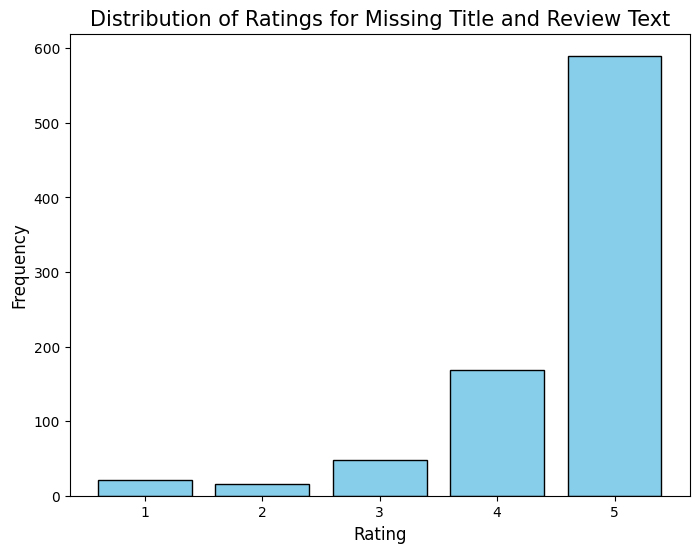

In [10]:
# Filter the data where both 'Title' and 'Review Text' are NaN
no_reviews = df[(df["Title"].isna()) & (df["Review Text"].isna())]["Rating"]

# Get the unique rating values and their counts
rating_counts = no_reviews.value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(8,6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')

# Set x-ticks to be the unique ratings
plt.xticks(rating_counts.index)

plt.title('Distribution of Ratings for Missing Title and Review Text', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


In [11]:
df.Rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

We observe that higher ratings are more likely to have empty reviews.


This can be due to two reasons:
1. The ratings are skewed towards higher values, so the proportion of missing reviews is fairly balanced across different ratings.

2. People often write reviews when they are dissatisfied with a product, while satisfied customers are more likely to simply give a rating without leaving a detailed review. This trend is reflected in our data

In [12]:
df= df[~(df["Title"].isna() & df["Review Text"].isna())]
#dropping rows where both title and review text are empty

In [13]:
df['Title'].fillna('',inplace=True)
df['Review Text'].fillna('',inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22642 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22642 non-null  int64 
 1   Age                      22642 non-null  int64 
 2   Title                    22642 non-null  object
 3   Review Text              22642 non-null  object
 4   Rating                   22642 non-null  int64 
 5   Recommended IND          22642 non-null  int64 
 6   Positive Feedback Count  22642 non-null  int64 
 7   Division Name            22629 non-null  object
 8   Department Name          22629 non-null  object
 9   Class Name               22629 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [15]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

### Balancing the Dataset

In [16]:
df['Department Name'].value_counts()

Tops        10048
Dresses      6146
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [17]:
df.groupby(['Rating','Recommended IND']).agg({'Recommended IND':'count'})

Recommended IND
Rating Recommended IND                 
1      0                            806
       1                             15
2      0                           1455
       1                             94
3      0                           1653
       1                           1170
4      0                            164
       1                           4744
5      0                             23
       1                          12505

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22629 entries, 0 to 22628
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22629 non-null  int64 
 1   Age                      22629 non-null  int64 
 2   Title                    22629 non-null  object
 3   Review Text              22629 non-null  object
 4   Rating                   22629 non-null  int64 
 5   Recommended IND          22629 non-null  int64 
 6   Positive Feedback Count  22629 non-null  int64 
 7   Division Name            22629 non-null  object
 8   Department Name          22629 non-null  object
 9   Class Name               22629 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.7+ MB


In [19]:
df.groupby('Recommended IND')['Recommended IND'].count()

Recommended IND
0     4101
1    18528
Name: Recommended IND, dtype: int64

In [20]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Recommended IND'] == 1]
df_minority = df[df['Recommended IND'] == 0]

desired_majority_count = 5000

# Undersample majority class to desired count
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=desired_majority_count,
                                   random_state=42)

# Combining minority class and downsampled majority class
df_bal = pd.concat([df_majority_downsampled, df_minority])


In [21]:
df_bal.groupby('Recommended IND')['Recommended IND'].count()

Recommended IND
0    4101
1    5000
Name: Recommended IND, dtype: int64

In [22]:
df_bal.groupby(['Rating','Recommended IND']).agg({'Recommended IND':'count'})

Recommended IND
Rating Recommended IND                 
1      0                            806
       1                              1
2      0                           1455
       1                             28
3      0                           1653
       1                            334
4      0                            164
       1                           1310
5      0                             23
       1                           3327

In [23]:
df.groupby(['Rating','Recommended IND']).agg({'Recommended IND':'count'})

Recommended IND
Rating Recommended IND                 
1      0                            806
       1                             15
2      0                           1455
       1                             94
3      0                           1653
       1                           1170
4      0                            164
       1                           4744
5      0                             23
       1                          12505

In [24]:
df_bal.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
12944,1094,51,"Feminine, classic beauty","Let's begin with the fabric....it's heavy, but...",5,1,0,General Petite,Dresses,Dresses
19088,46,42,Love,"I love this gown so much, i would wear it ever...",5,1,7,Initmates,Intimate,Intimates
10732,820,72,Much prettier in person,I bought this top for my mom for christmas. i ...,5,1,0,General Petite,Tops,Blouses
2841,895,48,Classic retailer,"From unique shape to feminine design, this cro...",5,1,6,General,Tops,Fine gauge
3725,1099,31,Gorgeous dress but runs large,I am 26 weeks pregnant and bought this in an x...,4,1,1,General,Dresses,Dresses


In [25]:
data=df_bal.copy()

In [26]:
data['Review']=data['Title']+' '+data['Review Text']

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9101 entries, 12944 to 22626
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              9101 non-null   int64 
 1   Age                      9101 non-null   int64 
 2   Title                    9101 non-null   object
 3   Review Text              9101 non-null   object
 4   Rating                   9101 non-null   int64 
 5   Recommended IND          9101 non-null   int64 
 6   Positive Feedback Count  9101 non-null   int64 
 7   Division Name            9101 non-null   object
 8   Department Name          9101 non-null   object
 9   Class Name               9101 non-null   object
 10  Review                   9101 non-null   object
dtypes: int64(5), object(6)
memory usage: 853.2+ KB


In [28]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
12944,1094,51,"Feminine, classic beauty","Let's begin with the fabric....it's heavy, but...",5,1,0,General Petite,Dresses,Dresses,"Feminine, classic beauty Let's begin with the ..."
19088,46,42,Love,"I love this gown so much, i would wear it ever...",5,1,7,Initmates,Intimate,Intimates,"Love I love this gown so much, i would wear it..."
10732,820,72,Much prettier in person,I bought this top for my mom for christmas. i ...,5,1,0,General Petite,Tops,Blouses,Much prettier in person I bought this top for ...
2841,895,48,Classic retailer,"From unique shape to feminine design, this cro...",5,1,6,General,Tops,Fine gauge,Classic retailer From unique shape to feminine...
3725,1099,31,Gorgeous dress but runs large,I am 26 weeks pregnant and bought this in an x...,4,1,1,General,Dresses,Dresses,Gorgeous dress but runs large I am 26 weeks pr...


In [29]:
data.drop(['Review Text','Title','Positive Feedback Count'],inplace=True,axis=1)

In [30]:
data.groupby(['Rating','Recommended IND']).agg({'Recommended IND':'count'})

Recommended IND
Rating Recommended IND                 
1      0                            806
       1                              1
2      0                           1455
       1                             28
3      0                           1653
       1                            334
4      0                            164
       1                           1310
5      0                             23
       1                           3327

In [31]:
# drop rows where rating is 4 or 5 and recommended ind column class is 0
data = data.loc[~(((data.Rating==4) | (data.Rating==5)) & (data['Recommended IND']==0))]

In [32]:
#dropping rows where rating is 1 but its recommended
data = data.loc[~(((data.Rating==1) | (data.Rating==2)) & (data['Recommended IND']==1))]

In [33]:
data.head()

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Review
12944,1094,51,5,1,General Petite,Dresses,Dresses,"Feminine, classic beauty Let's begin with the ..."
19088,46,42,5,1,Initmates,Intimate,Intimates,"Love I love this gown so much, i would wear it..."
10732,820,72,5,1,General Petite,Tops,Blouses,Much prettier in person I bought this top for ...
2841,895,48,5,1,General,Tops,Fine gauge,Classic retailer From unique shape to feminine...
3725,1099,31,4,1,General,Dresses,Dresses,Gorgeous dress but runs large I am 26 weeks pr...


In [34]:
data.columns = ['Clothing ID', 'Age', 'Rating', 'Recommended', 'Division Name', 'Department Name', 'Class Name', 'Review']

In [35]:
data.reset_index(drop=True, inplace=True)

In [36]:
data.groupby(['Rating','Recommended']).agg({'Recommended':'count'})

Recommended
Rating Recommended             
1      0                    806
2      0                   1455
3      0                   1653
       1                    334
4      1                   1310
5      1                   3327

In [37]:
data['Recommended'].value_counts()

1    4971
0    3914
Name: Recommended, dtype: int64

Now our Dataset looks much more balanced.

We can go ahead and perform sentiment analysis and build our models for classfication with this cleaned and balanced dataset!

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8885 entries, 0 to 8884
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Clothing ID      8885 non-null   int64 
 1   Age              8885 non-null   int64 
 2   Rating           8885 non-null   int64 
 3   Recommended      8885 non-null   int64 
 4   Division Name    8885 non-null   object
 5   Department Name  8885 non-null   object
 6   Class Name       8885 non-null   object
 7   Review           8885 non-null   object
dtypes: int64(4), object(4)
memory usage: 555.4+ KB


In [39]:
import pickle
pickle.dump(data,open("clothdf_clean","wb"))

In [40]:
import pickle
with open("clothdf_clean", 'rb') as f:
    df = pickle.load(f)

In [41]:
df.head()

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review
0,1094,51,5,1,General Petite,Dresses,Dresses,"Feminine, classic beauty Let's begin with the ..."
1,46,42,5,1,Initmates,Intimate,Intimates,"Love I love this gown so much, i would wear it..."
2,820,72,5,1,General Petite,Tops,Blouses,Much prettier in person I bought this top for ...
3,895,48,5,1,General,Tops,Fine gauge,Classic retailer From unique shape to feminine...
4,1099,31,4,1,General,Dresses,Dresses,Gorgeous dress but runs large I am 26 weeks pr...


# Data Visualization


In [42]:
# Calculate average ratings by Department, Class, and Division
avg_ratings_dept = data.groupby('Department Name')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
avg_ratings_class = data.groupby('Class Name')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
avg_ratings_division = data.groupby('Division Name')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)

# Initialize the initial column to be displayed
initial_column = 'Department Name'
initial_data = avg_ratings_dept

# Create a bar chart using Plotly
fig = px.bar(
    initial_data,
    x=initial_data[initial_column],
    y='Rating',
    color='Rating',
    color_continuous_scale='sunset',
    title=f'Average Ratings by {initial_column}'
)

# Update layout
fig.update_layout(
    xaxis_title=initial_column,
    yaxis_title='Average Rating',
    plot_bgcolor='white',
)

fig.update_layout(barmode='group')

# Define columns to switch between
columns = ['Department Name', 'Class Name', 'Division Name']
buttons = []

# Add buttons for each column
for column in columns:
    if column == 'Department Name':
        dp = avg_ratings_dept
    elif column == 'Division Name':
        dp = avg_ratings_division
    else:
        dp = avg_ratings_class

    button = dict(
        label=column,
        method='update',
        args=[
            {'x': [dp[column]], 'y': [dp['Rating']], 'marker.color': [dp['Rating']]},
            {'title': f'Average Ratings by {column}',
             'xaxis': {'title': column},
             'coloraxis': {'colorbar': {'title': 'Rating'}, 'colorscale': 'sunset'}}
        ]
    )
    buttons.append(button)

# Add buttons to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True
        )
    ]
)

fig.show()

In [43]:
# Calculate value counts for each column
value_counts_dept = data['Department Name'].value_counts().reset_index()
value_counts_class = data['Class Name'].value_counts().reset_index()
value_counts_division = data['Division Name'].value_counts().reset_index()

# Rename columns for plotting
value_counts_dept.columns = ['Name', 'Count']
value_counts_class.columns = ['Name', 'Count']
value_counts_division.columns = ['Name', 'Count']

# Initialize the initial column to be displayed
initial_column = 'Department Name'
initial_data = value_counts_dept

# Create a bar chart using Plotly
fig = px.bar(
    initial_data,
    x='Name',
    y='Count',
    color='Count',
    color_continuous_scale='Inferno',
    title=f'Value Counts of {initial_column}'
)

# Update layout
fig.update_layout(
    xaxis_title=initial_column,
    yaxis_title='Count',
    plot_bgcolor='white',
)

fig.update_layout(barmode='group')

# Define columns to switch between
columns = ['Department Name', 'Class Name', 'Division Name']
buttons = []

# Add buttons for each column
for column in columns:
    if column == 'Department Name':
        dp = value_counts_dept
    elif column == 'Division Name':
        dp = value_counts_division
    else:
        dp = value_counts_class

    button = dict(
        label=column,
        method='update',
        args=[
            {'x': [dp['Name']], 'y': [dp['Count']], 'marker.color': [dp['Count']], 'marker.colorscale': 'Inferno'},
            {'title': f'Value Counts of {column}',
             'xaxis': {'title': column},
             }
        ]
    )
    buttons.append(button)

# Add buttons to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True
        )
    ]
)

fig.show()

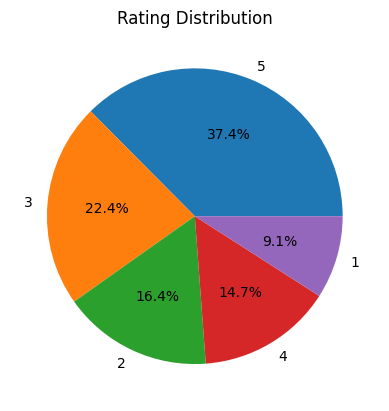

In [44]:

# Calculate the value counts of each category
Rating_counts = data['Rating'].value_counts()

# Calculate the percentage for each category
Rating_percentages = Rating_counts / len(df) * 100

# Create a pie chart
plt.pie(Rating_percentages, labels=Rating_percentages.index, autopct='%1.1f%%')

# Set plot title
plt.title('Rating Distribution')

# Display the plot
plt.show()


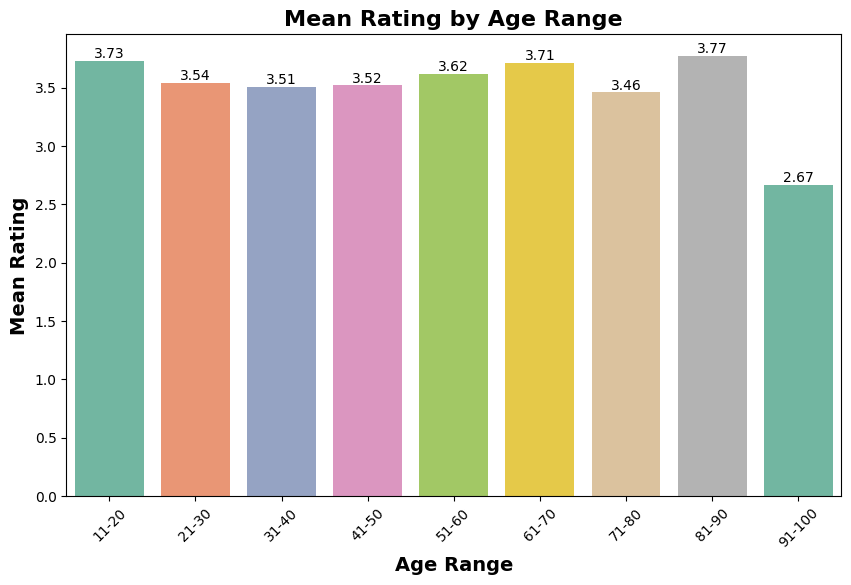

In [47]:
# Bar plot of mean rating by age range

# Define the age ranges
age_ranges = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Categorize the age column into age ranges
data['Age Range'] = pd.cut(data['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=age_ranges)

# Calculate the mean rating for each age range
mean_ratings = data.groupby('Age Range')['Rating'].mean().round(2)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_ratings.index, y=mean_ratings.values, hue=mean_ratings.index, palette='Set2', dodge=False, legend=False)

# Add data labels to the bars
for i, v in enumerate(mean_ratings.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Mean Rating by Age Range', fontweight='bold', fontsize=16)
plt.xlabel('Age Range', fontweight='bold', fontsize=14)
plt.ylabel('Mean Rating', fontweight='bold', fontsize=14)

plt.xticks(rotation=45)

plt.show()


In [48]:
import plotly.graph_objects as go

def create_pie_chart(age_range):
    age_range_data = data[data['Age Range'] == age_range]
    counts = age_range_data['Recommended'].value_counts()
    percentages = counts / counts.sum() * 100
    return go.Figure(
        data=[
            go.Pie(
                labels=percentages.index,
                values=percentages,
                hoverinfo='label+percent+text',
                textinfo='label+percent+text',
                text=[f"Count: {count}" for count in counts]
            )
        ],
        layout_title_text=f"Recommended Distribution for Age Range: {age_range}",
        layout_showlegend=True,
        layout_legend_title='Recommended'
    )

# Create the initial pie chart
initial_age_range = data['Age Range'].unique()[0]
fig = create_pie_chart(initial_age_range)

# Define the age ranges and buttons, ensuring sorted order
age_ranges = sorted(data['Age Range'].unique())

buttons = []

# Add buttons for each age range
for age_range in age_ranges:
    button = dict(
        label=age_range,
        method='update',
        args=[
            {
                'values': [create_pie_chart(age_range)['data'][0]['values']],
                'labels': [create_pie_chart(age_range)['data'][0]['labels']],
                'text': [create_pie_chart(age_range)['data'][0]['text']]
            },
            {
                'title': f"Recommended Distribution for Age Range: {age_range}"
            }
        ]
    )
    buttons.append(button)

# Add buttons to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True
        )
    ]
)

fig.show()


- Helps identify which categories are doing well and which need improvement.
- Analyzing the audience based on different age ranges.
- How are different age ranges responding to the products, and which age groups are more likely to recommend the products?
    
    For instance, if a large proportion of a specific age range is not recommending the product, the business might need to adjust its design or marketing strategies to better cater to that demographic.

# NLP

In [49]:
data[data['Rating']==3].sample(3)

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range
8203,895,51,3,0,General,Tops,Fine gauge,Short torso and static cling problem This top ...,51-60
6306,867,42,3,0,General Petite,Tops,Knits,Eh... Too floppy; light and comfortable materi...,41-50
8042,936,44,3,0,General,Tops,Sweaters,"Beautiful, but... Picked this up in the store ...",41-50


In [50]:
data[data['Review']==' ']

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range


In [52]:
data.reset_index(drop=True, inplace=True)

In [53]:
negrev=data[data['Recommended']==0]
posrev=data[data['Recommended']==1]

In [54]:
print(f"positive reviews:{len(posrev)}\nnegative reviews::{len(negrev)}")

positive reviews:4971
negative reviews::3914


In [55]:
data.sample()

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range
5881,862,39,2,0,General,Tops,Knits,Fyi photo of black shirt is misleading 1.) if ...,31-40


In [56]:
import re

def remove_punctuation(text):
    # Define the pattern to match punctuation
    pattern = r'[^\w\s]'  # Matches any non-word (alphanumeric) or non-whitespace character

    # Use re.sub() to replace punctuation with empty string
    text_no_punctuation = re.sub(pattern, '', text)

    return text_no_punctuation


In [57]:
data['Cleaned_Review'] = data['Review'].apply(remove_punctuation)

In [58]:
data[['Review','Cleaned_Review']]

,Review,Cleaned_Review
0,"Feminine, classic beauty Let's begin with the ...",Feminine classic beauty Lets begin with the fa...
1,"Love I love this gown so much, i would wear it...",Love I love this gown so much i would wear it ...
2,Much prettier in person I bought this top for ...,Much prettier in person I bought this top for ...
3,Classic retailer From unique shape to feminine...,Classic retailer From unique shape to feminine...
4,Gorgeous dress but runs large I am 26 weeks pr...,Gorgeous dress but runs large I am 26 weeks pr...
...,...,...
8880,Not for me I tried these on because the color ...,Not for me I tried these on because the color ...
8881,I wanted to love this jacket. so soft and gre...,I wanted to love this jacket so soft and grea...
8882,Such high hopes! I purchased this for a very g...,Such high hopes I purchased this for a very go...
8883,Unflattering I was surprised at the positive r...,Unflattering I was surprised at the positive r...


In [59]:
# Adjust display settings to show full content of 'Cleaned_Review'
pd.options.display.max_colwidth = None

In [60]:
s=data.sample(3)
s[['Cleaned_Review']]


,Cleaned_Review
719,Beautiful dress So much to love about this dress the color is exactly as pictured in the video not photos the fabric is substantial beautiful colors the dress is well constructed back zipper and is easy to put on and take off it is not only lined but has a crinoline built in to the liner its not super puffy just enough to give it some flare i am 36b 58 155 lbs and bought a 10 it fits me perfectly the shoulders are a smidge too big but not enough for me to have them taken up just yet oh and i
7188,Cute but too short This top is very cute and if you are short you will love it i am tall and the dividing line of color block kept rising up over my bust so it looked weird it made it look like an ill fitting maternity top had to go back
8738,Cuter online I wanted to love this dress and did from the picture online when it arrived the black already looked faded and old also the embroidery looks like a grandma but not in a cute vintage way the fabric is stiff which causes a boxy unflattering look had to return it


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [66]:
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [67]:
cleaned_stop = [remove_punctuation(word) for word in stop]
print(cleaned_stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

Stop words include  words such as `not`, but removing it may lead misleading review.

Ex: this dress is not comfortable → this dress is comfortable

So, we should drop `not` and similar words from the ‘stopwords’ and proceed to clean our ‘review’ through stemming

In [68]:
word_tbr=['ain', 'aren', 'arent', 'couldn', 'couldnt', 'didn', 'didnt', 'doesn', 'doesnt', 'hadn', 'hadnt', 'hasn', 'hasnt', 'haven', 'havent', 'isn', 'isnt', 'ma', 'mightn', 'mightnt', 'mustn', 'mustnt', 'needn', 'neednt', 'shan', 'shant', 'shouldn', 'shouldnt', 'wasn', 'wasnt', 'weren', 'werent', 'won', 'wont', 'wouldn', 'wouldnt','dont','no', 'nor', 'not']

In [69]:
fin_stop = [word for word in cleaned_stop if word not in word_tbr]

In [71]:
data.head(2)

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range,Cleaned_Review
0,1094,51,5,1,General Petite,Dresses,Dresses,"Feminine, classic beauty Let's begin with the fabric....it's heavy, but not in a burdensome way. as soon as you put it on, you feel like you have a quality piece of clothing on. next: aesthetics---this dress is flowy and feminine. and a bonus, it made me look bustier than i am; perhaps because of the stripes. i didn't find myself pulling this dress up all the time. once i put it on, it stayed in place perfectly. bottom line: this dress goes from dressy to casual without a second thought. and it's on sale--grab this one",51-60,Feminine classic beauty Lets begin with the fabricits heavy but not in a burdensome way as soon as you put it on you feel like you have a quality piece of clothing on next aestheticsthis dress is flowy and feminine and a bonus it made me look bustier than i am perhaps because of the stripes i didnt find myself pulling this dress up all the time once i put it on it stayed in place perfectly bottom line this dress goes from dressy to casual without a second thought and its on salegrab this one
1,46,42,5,1,Initmates,Intimate,Intimates,"Love I love this gown so much, i would wear it everyday if i could. it is cozy, beautiful, and feels special like an heirloom. the top is perfect coverage and the skirt is so soft. color is much prettier than the photo picks up!!! i love this gown. my favorite, hands down.",41-50,Love I love this gown so much i would wear it everyday if i could it is cozy beautiful and feels special like an heirloom the top is perfect coverage and the skirt is so soft color is much prettier than the photo picks up i love this gown my favorite hands down


In [72]:
clothes_list =['dress', 'top','pant','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear','pant','denim','legging','blouse']

In [73]:
def remove_words(review):
    words = review.split()  # Split the review into words
    cleaned_words = [word for word in words if word.lower() not in clothes_list]  # Filter out words not in the list

    cleaned_review = ' '.join(cleaned_words)  # Join the cleaned words back into a review
    return cleaned_review

data['CleanedReview'] = data['Cleaned_Review'].apply(remove_words)

In [74]:
data.head(2)

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range,Cleaned_Review,CleanedReview
0,1094,51,5,1,General Petite,Dresses,Dresses,"Feminine, classic beauty Let's begin with the fabric....it's heavy, but not in a burdensome way. as soon as you put it on, you feel like you have a quality piece of clothing on. next: aesthetics---this dress is flowy and feminine. and a bonus, it made me look bustier than i am; perhaps because of the stripes. i didn't find myself pulling this dress up all the time. once i put it on, it stayed in place perfectly. bottom line: this dress goes from dressy to casual without a second thought. and it's on sale--grab this one",51-60,Feminine classic beauty Lets begin with the fabricits heavy but not in a burdensome way as soon as you put it on you feel like you have a quality piece of clothing on next aestheticsthis dress is flowy and feminine and a bonus it made me look bustier than i am perhaps because of the stripes i didnt find myself pulling this dress up all the time once i put it on it stayed in place perfectly bottom line this dress goes from dressy to casual without a second thought and its on salegrab this one,Feminine classic beauty Lets begin with the fabricits heavy but not in a burdensome way as soon as you put it on you feel like you have a quality piece of clothing on next aestheticsthis is flowy and feminine and a bonus it made me look bustier than i am perhaps because of the stripes i didnt find myself pulling this up all the time once i put it on it stayed in place perfectly bottom line this goes from dressy to casual without a second thought and its on salegrab this one
1,46,42,5,1,Initmates,Intimate,Intimates,"Love I love this gown so much, i would wear it everyday if i could. it is cozy, beautiful, and feels special like an heirloom. the top is perfect coverage and the skirt is so soft. color is much prettier than the photo picks up!!! i love this gown. my favorite, hands down.",41-50,Love I love this gown so much i would wear it everyday if i could it is cozy beautiful and feels special like an heirloom the top is perfect coverage and the skirt is so soft color is much prettier than the photo picks up i love this gown my favorite hands down,Love I love this gown so much i would it everyday if i could it is cozy beautiful and feels special like an heirloom the is perfect coverage and the is so soft is much prettier than the photo picks up i love this gown my favorite hands down


In [75]:
df.reset_index(drop=True, inplace=True)

In [76]:
rating_labels = {
    1: 'Very Poor',
    2: 'Poor',
    3: 'Average',
    4: 'Good',
    5: 'Excellent'
}
data['Rating'] = data['Rating'].map(rating_labels)

data.sample(3)

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Review,Age Range,Cleaned_Review,CleanedReview
2202,1020,36,Excellent,1,General,Bottoms,Skirts,Fun summer skirt This skirt caught my eyes right away in the clearance section. i would have tried size 2 but it wasn't available. however size 4 fitted just fine. the print has bright summery feel to it. the lines on skirt are more carrot orange than it is to red. fabric is soft.,31-40,Fun summer skirt This skirt caught my eyes right away in the clearance section i would have tried size 2 but it wasnt available however size 4 fitted just fine the print has bright summery feel to it the lines on skirt are more carrot orange than it is to red fabric is soft,Fun summer This caught my eyes right away in the clearance section i would have tried size 2 but it wasnt available however size 4 fitted just fine the print has bright summery feel to it the lines on are more carrot orange than it is to red is soft
619,1078,72,Good,1,General,Dresses,Dresses,"This dress is perfect for my florida lifestyle because of the fabric and the design. it is not the color pictured on the web page which was a disappointment. the color is a lot duller. i tried it on in the store and found it to be tight across the chest, another lady who also tried it had the same problem. i went home and ordered a larger size. that dress was baggy and not as cute in the back. i realized because of the under slip it could be left open to the waist and work just fine. i ended up",71-80,This dress is perfect for my florida lifestyle because of the fabric and the design it is not the color pictured on the web page which was a disappointment the color is a lot duller i tried it on in the store and found it to be tight across the chest another lady who also tried it had the same problem i went home and ordered a larger size that dress was baggy and not as cute in the back i realized because of the under slip it could be left open to the waist and work just fine i ended up,This is perfect for my florida lifestyle because of the and the design it is not the pictured on the web page which was a disappointment the is a lot duller i tried it on in the store and found it to be tight across the chest another lady who also tried it had the same problem i went home and ordered a larger size that was baggy and not as cute in the back i realized because of the under slip it could be left open to the waist and work just fine i ended up
6225,986,43,Very Poor,0,General,Jackets,Jackets,"Quality does not merit cost I generally don't write bad reviews, but there is a real discrepancy between the quality of this kimono and the cost. the design and colors are great, but the fabric is ripping on all the kimonos on the rack in my store where the manufacturer's tag is at the back of the neck. the material is very thin, so there are other small holes beginning throughout the garment. i shop at retailer all the time, and this is not a $98 item of clothing.",41-50,Quality does not merit cost I generally dont write bad reviews but there is a real discrepancy between the quality of this kimono and the cost the design and colors are great but the fabric is ripping on all the kimonos on the rack in my store where the manufacturers tag is at the back of the neck the material is very thin so there are other small holes beginning throughout the garment i shop at retailer all the time and this is not a 98 item of clothing,Quality does not merit cost I generally dont write bad reviews but there is a real discrepancy between the quality of this kimono and the cost the design and colors are great but the is ripping on all the kimonos on the rack in my store where the manufacturers tag is at the back of the neck the is very thin so there are other small holes beginning throughout the garment i shop at retailer all the time and this is not a 98 item of clothing


In [77]:
data['combined_review']=data.iloc[:,[2,10]].apply(lambda x: ' '.join(x), axis=1)

In [78]:
data.drop(['Review','Cleaned_Review'],axis=1,inplace=True)

In [79]:
data.head(3)

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,Age Range,CleanedReview,combined_review
0,1094,51,Excellent,1,General Petite,Dresses,Dresses,51-60,Feminine classic beauty Lets begin with the fabricits heavy but not in a burdensome way as soon as you put it on you feel like you have a quality piece of clothing on next aestheticsthis is flowy and feminine and a bonus it made me look bustier than i am perhaps because of the stripes i didnt find myself pulling this up all the time once i put it on it stayed in place perfectly bottom line this goes from dressy to casual without a second thought and its on salegrab this one,Excellent Feminine classic beauty Lets begin with the fabricits heavy but not in a burdensome way as soon as you put it on you feel like you have a quality piece of clothing on next aestheticsthis is flowy and feminine and a bonus it made me look bustier than i am perhaps because of the stripes i didnt find myself pulling this up all the time once i put it on it stayed in place perfectly bottom line this goes from dressy to casual without a second thought and its on salegrab this one
1,46,42,Excellent,1,Initmates,Intimate,Intimates,41-50,Love I love this gown so much i would it everyday if i could it is cozy beautiful and feels special like an heirloom the is perfect coverage and the is so soft is much prettier than the photo picks up i love this gown my favorite hands down,Excellent Love I love this gown so much i would it everyday if i could it is cozy beautiful and feels special like an heirloom the is perfect coverage and the is so soft is much prettier than the photo picks up i love this gown my favorite hands down
2,820,72,Excellent,1,General Petite,Tops,Blouses,71-80,Much prettier in person I bought this for my mom for christmas i wasnt sure if she would like it but it is really nice in person and she loved it it fit true to size and can be dressed down as it is on the model or dressed up i am so glad i decided to get this highly recommend,Excellent Much prettier in person I bought this for my mom for christmas i wasnt sure if she would like it but it is really nice in person and she loved it it fit true to size and can be dressed down as it is on the model or dressed up i am so glad i decided to get this highly recommend


In [ ]:
nltk.download('wordnet')

In [80]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the corpus
lemmatized_corpus = []
for review in data["combined_review"]:  # Iterate directly over the reviews
    try:
        # Clean the review text
        review = re.sub('[^a-zA-Z]', ' ', review)  # Use review directly instead of indexing
        review = review.lower()
        review = review.split()
        
        # Lemmatize and filter stop words
        review = [lemmatizer.lemmatize(word) for word in review if word not in fin_stop]
        
        # Join the lemmatized words back into a single string
        review = ' '.join(review)
        
        # Append to lemmatized_corpus
        lemmatized_corpus.append(review)
    except KeyError:
        continue  # Continue if a KeyError occurs

# Print the last 5 lemmatized reviews
print("Lemmatized Corpus:")
for review in lemmatized_corpus[-5:]:
    print(review)


Lemmatized Corpus:
average not tried really pretty fun donset want pair comfycute pant looked awful muscular thigh dont think cut falttering population also not comfortable looked crotch seemed little low though pant correct size
average wanted love jacket soft great unfortunately light weight almost like nice heft though nice length accept sleeve short lb small right size looking something slightly warmer layer
average high hope purchased good price typically love maeve winwin thin slinky unfortunate way made finding appropriate undergarment difficult add slip helped figured since im losing weight would look better im pound said didnt find figure flattering tummy least one photo bridal shower wore lo
poor unflattering surprised positive review product terrible cut weird place make look wide also not like picture darker heavier isnt great return
average cute see fit well see never would worked im glad able try store didnt online different would great


In [81]:
len(set(' '.join(lemmatized_corpus).split()))

10733

In [83]:
lemmatized_corpus[1:3]

['excellent love love gown much would everyday could cozy beautiful feel special like heirloom perfect coverage soft much prettier photo pick love gown favorite hand',
 'excellent much prettier person bought mom christmas wasnt sure would like really nice person loved fit true size dressed model dressed glad decided get highly recommend']

In [84]:
data.drop(['Age Range','CleanedReview'],axis=1,inplace=True)


In [ ]:
nltk.download('punkt')

In [85]:
from nltk.tokenize import word_tokenize
def apply_stop(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word.lower() not in fin_stop]
    text = " ".join(tokens)

    return text

data['Processed_Review'] = data['combined_review'].apply(apply_stop)

data[['combined_review', 'Processed_Review']]

,combined_review,Processed_Review
0,Excellent Feminine classic beauty Lets begin with the fabricits heavy but not in a burdensome way as soon as you put it on you feel like you have a quality piece of clothing on next aestheticsthis is flowy and feminine and a bonus it made me look bustier than i am perhaps because of the stripes i didnt find myself pulling this up all the time once i put it on it stayed in place perfectly bottom line this goes from dressy to casual without a second thought and its on salegrab this one,Excellent Feminine classic beauty Lets begin fabricits heavy not burdensome way soon put feel like quality piece clothing next aestheticsthis flowy feminine bonus made look bustier perhaps stripes didnt find pulling time put stayed place perfectly bottom line goes dressy casual without second thought salegrab one
1,Excellent Love I love this gown so much i would it everyday if i could it is cozy beautiful and feels special like an heirloom the is perfect coverage and the is so soft is much prettier than the photo picks up i love this gown my favorite hands down,Excellent Love love gown much would everyday could cozy beautiful feels special like heirloom perfect coverage soft much prettier photo picks love gown favorite hands
2,Excellent Much prettier in person I bought this for my mom for christmas i wasnt sure if she would like it but it is really nice in person and she loved it it fit true to size and can be dressed down as it is on the model or dressed up i am so glad i decided to get this highly recommend,Excellent Much prettier person bought mom christmas wasnt sure would like really nice person loved fit true size dressed model dressed glad decided get highly recommend
3,Excellent Classic retailer From unique shape to feminine design this cropped summer is the kind of item that attracted me to retailer thirteen years ago its also flattering especially for this petite who doesnt like to show her upper arms,Excellent Classic retailer unique shape feminine design cropped summer kind item attracted retailer thirteen years ago also flattering especially petite doesnt like show upper arms
4,Good Gorgeous but runs large I am 26 weeks pregnant and bought this in an xs to to my shower this weekend i am delighted with how it looks on but it really might be too big for someone who isnt pregnant,Good Gorgeous runs large weeks pregnant bought xs shower weekend delighted looks really might big someone isnt pregnant
...,...,...
8880,Average Not for me I tried these on because the is really pretty and fun and who donset want a pair of comfycute pants but they looked awful on my muscular thighs i dont think the cut will be falttering on 99 of the population also not as comfortable as they looked the crotch seemed a little low on me though the pants were in the correct size,Average Not tried really pretty fun donset want pair comfycute pants looked awful muscular thighs dont think cut falttering population also not comfortable looked crotch seemed little low though pants correct size
8881,Average I wanted to love this jacket so soft and great unfortunately it is just too light weight it is almost like nice heft to the though nice length accept the sleeves were short on me i am 510 and 135lbs the small was the right size i was looking for something slightly warmer to layer,Average wanted love jacket soft great unfortunately light weight almost like nice heft though nice length accept sleeves short small right size looking something slightly warmer layer
8882,Average Such high hopes I purchased this for a very good price and i typically love maeve should have been a winwin the is thin and slinky in the most unfortunate way it made finding appropriate undergarments very difficult i had to add a slip that helped and figured that since im losing weight it would look better when im down a few more pounds that being said i didnt find it to be figure flattering i have a tummy and there was at least one photo from the bridal shower 

In [86]:
pos_df=data[data['Recommended']==1]
neg_df=data[data['Recommended']==0]

In [87]:
pos_words =[]
neg_words = []

for review in pos_df.Processed_Review:
    pos_words.append(review)
pos_words = ' '.join(pos_words)


for review in neg_df.Processed_Review:
    neg_words.append(review)
neg_words = ' '.join(neg_words)


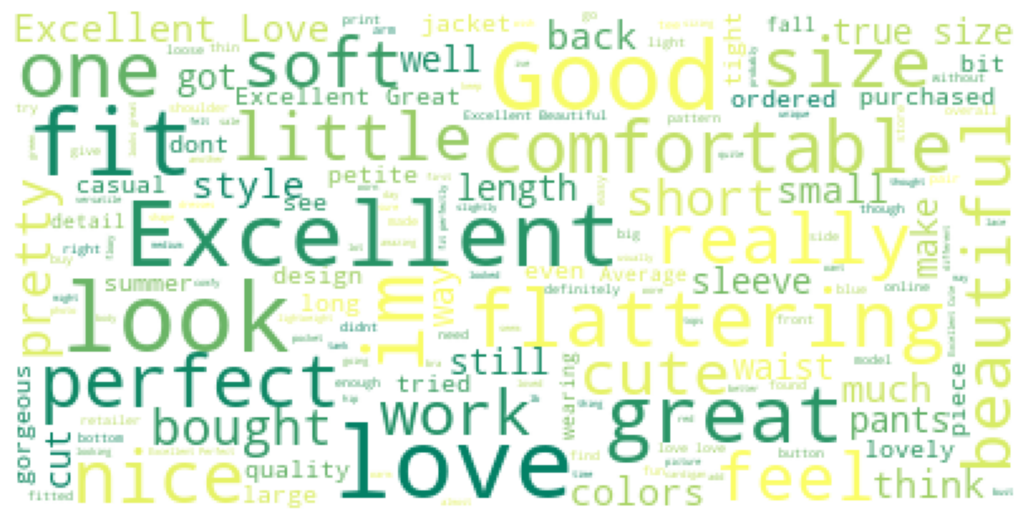

In [88]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

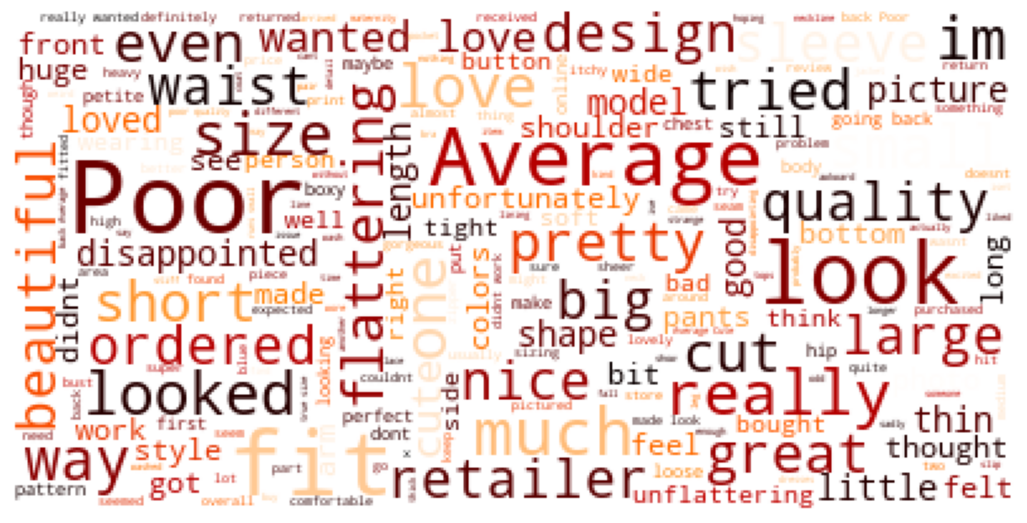

In [89]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [90]:
data.sample(3)

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,combined_review,Processed_Review
3024,1081,47,Excellent,1,General Petite,Dresses,Dresses,Excellent It is versitle and sleek design I personally like light garment and simple design for my daily dresses it meets my needs i personally recommend it to customers,Excellent versitle sleek design personally like light garment simple design daily dresses meets needs personally recommend customers
6635,829,53,Poor,0,General,Tops,Blouses,Poor Again my bad for not looking at description I did not like this at allbut had i looked at the prior to purchasing i would not have it is polyesteri thought it was cotton so theres the first reason i didnt like it secondly there is a piece of behind the laces presumably for modesty that refuses to lay flat it wrinkles up behind the lacing making it appear as if one is wearing an undershirt or cami that is not appropriate for the it is too long for me the hitting at of thigh this is just reall,Poor bad not looking description not like allbut looked prior purchasing would not polyesteri thought cotton theres first reason didnt like secondly piece behind laces presumably modesty refuses lay flat wrinkles behind lacing making appear one wearing undershirt cami not appropriate long hitting thigh reall
1972,863,43,Excellent,1,General,Tops,Knits,Excellent Great Bought this in the runs tts very comfortable and flattering past left of center shirts in this stylefabric seem to run a little large but i bought this in my usual retailer m and its great very similar to last years style but perhaps a tad more fitted i gave it a 4 for quality bc i have noticed a little bit of pilling under the arm area but overall it holds up pretty well,Excellent Great Bought runs tts comfortable flattering past left center shirts stylefabric seem run little large bought usual retailer great similar last years style perhaps tad fitted gave quality bc noticed little bit pilling arm area overall holds pretty well


In [91]:
datanlp2=data.copy()

In [92]:
pickle.dump(datanlp2,open("clothdata3","wb")) # type: ignore

# Tf-idf model

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_df=0.75, min_df=10, ngram_range=(1, 2))
p=tv.fit_transform(lemmatized_corpus).toarray()

In [94]:
dp=pd.DataFrame(p,columns=tv.get_feature_names_out())
df_all=pd.merge(data,dp, left_index=True, right_index=True )
df_all.tail(2) 

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,combined_review,Processed_Review,able,...,yet,yoga,yoke,young,younger,zero,zip,zipped,zipper,zipper back
8883,1104,32,Very Poor,0,General Petite,Dresses,Dresses,Very Poor Unflattering I was surprised at the positive reviews for this product its terrible it cuts you in a weird place to make you look wide the is also not like the picture its darker and heavier the isnt great i had to return,Poor Unflattering surprised positive reviews product terrible cuts weird place make look wide also not like picture darker heavier isnt great return,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8884,1104,31,Average,0,General Petite,Dresses,Dresses,Average Cute but see through This fit well but the was very see through this never would have worked for me im glad i was able to try it on in the store and didnt it online with different it would have been great,Average Cute see fit well see never would worked im glad able try store didnt online different would great,0.194109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# Optional: Summarize the scores for each term across all documents
# This step will give you the average TF-IDF score per term across all reviews
average_scores = dp.mean().sort_values(ascending=False)

# Create a DataFrame for the words and their average TF-IDF scores
tfidf_scores_df = pd.DataFrame(average_scores).reset_index()
tfidf_scores_df.columns = ['Term', 'Average_TFIDF_Score']

# Display the top 10 terms with the highest average TF-IDF scores
print(tfidf_scores_df.head(10))

        Term  Average_TFIDF_Score
0        not             0.034248
1       love             0.030311
2        fit             0.029910
3  excellent             0.028249
4       size             0.027548
5       like             0.025569
6       look             0.025203
7      great             0.024399
8       poor             0.023094
9       good             0.021277


In [96]:
X = df_all.drop(['Clothing ID','Recommended','combined_review','Processed_Review','Division Name','Department Name','Class Name','Rating'],axis=1)
y = df_all.Recommended

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [99]:
scaled_age=scaler.fit_transform(X_train['Age'].values.reshape(-1,1))

In [100]:
X_train['Age']=scaled_age

In [101]:
scaled_agetest=scaler.fit_transform(X_test['Age'].values.reshape(-1,1))

In [102]:
X_test['Age']=scaled_agetest

In [103]:
X_train

,Age,able,able get,able try,absolute,absolutely,absolutely beautiful,absolutely fell,absolutely gorgeous,absolutely love,...,yet,yoga,yoke,young,younger,zero,zip,zipped,zipper,zipper back
5386,0.223684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7016,0.460526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5962,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,0.328947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7698,0.381579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,0.342105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7891,0.236842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4859,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.210526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


# Training and predicting with different ML models

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [106]:
y_pred = classifier.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score

In [108]:
def algo_accuracy(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    acc_score=accuracy_score(y_test,y_pred)
    p_score=precision_score(y_test,y_pred)
    r_score=recall_score(y_test,y_pred)
    f_score=f1_score(y_test,y_pred)

    return cm, acc_score,p_score,r_score,f_score


In [109]:
algo_accuracy(y_test,y_pred)

(array([[755,  14],
        [ 65, 943]], dtype=int64),
 0.955543050084412,
 0.9853709508881923,
 0.935515873015873,
 0.9597964376590331)

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 30, criterion = 'gini', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=0)

In [111]:
y_predr = rf.predict(X_test)

In [112]:
algo_accuracy(y_test,y_predr)

(array([[763,   6],
        [ 76, 932]], dtype=int64),
 0.9538548114800225,
 0.9936034115138592,
 0.9246031746031746,
 0.9578622816032888)

In [113]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [114]:
nb_pred= nb.predict(X_test)

In [115]:
algo_accuracy(y_test,nb_pred)

(array([[685,  84],
        [144, 864]], dtype=int64),
 0.8716938660664041,
 0.9113924050632911,
 0.8571428571428571,
 0.8834355828220858)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [117]:
knn_pred= knn.predict(X_test)

In [118]:
algo_accuracy(y_test,knn_pred)

(array([[638, 131],
        [149, 859]], dtype=int64),
 0.8424310635903207,
 0.8676767676767677,
 0.8521825396825397,
 0.8598598598598598)

In [119]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=10 ,random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [120]:
dt_pred= dt.predict(X_test)

In [121]:
algo_accuracy(y_test,dt_pred)

(array([[755,  14],
        [ 71, 937]], dtype=int64),
 0.9521665728756331,
 0.9852786540483701,
 0.9295634920634921,
 0.9566105155691679)

# Visualizing and comparing results of models

In [122]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

# Compute metrics for each model
results = {
    'Logistic Regression': {},
    'Random Forest': {},
    'Naive Bayes': {},
    'K-Nearest Neighbors': {},
    'Decision Tree': {}
}

models_predictions = {
    'Logistic Regression': y_pred,
    'Random Forest': y_predr,
    'Naive Bayes': nb_pred,
    'K-Nearest Neighbors': knn_pred,
    'Decision Tree': dt_pred
}

for model, y_pred in models_predictions.items():
    for metric_name, metric_func in metrics.items():
        results[model][metric_name] = metric_func(y_test, y_pred)

# Convert results to a format suitable for Plotly
metric_names = list(metrics.keys())
model_names = list(results.keys())
data = {
    metric: [results[model][metric] for model in model_names]
    for metric in metric_names
}

In [123]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio


# Create a figure with initial data
fig = go.Figure()
# Create initial bar plot with the 'sunset' colorscale
initial_metric = 'Accuracy'
fig.add_trace(go.Bar(
    x=model_names,
    y=data[initial_metric],
    name=initial_metric,
    marker=dict(
        color=data[initial_metric],
        colorscale='sunset'
    )
))
fig.update_layout(
    title=f'Model Comparison by {initial_metric}',
    xaxis_title='Models',
    yaxis_title=initial_metric,
    updatemenus=[
        {
            "buttons": [
                {
                    "label": metric,
                    "method": "update",
                    "args": [
                        {"y": [data[metric]]},
                        {
                            "title": f"Model Comparison by {metric}",
                            "yaxis": {"title": metric},
                            "marker": dict(color=data[metric], colorscale='sunset')
                        }
                    ]
                } for metric in metric_names
            ],
            "direction": "down",
            "showactive": True
        }
    ]
)

fig.show()

In [124]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def predict_recommendation():
    """
    This function interacts with the user to input review text and age,
    and predicts whether the review is recommended or not recommended.

    Returns:
        A string "Recommended" or "Not Recommended" based on the prediction.
    """
    # Input from user
    review = input("Enter your review: ")
    age = float(input("Enter your age: "))

    # Print entered review and age
    print(f"Review entered: {review}")
    print(f"Age entered: {age}")

    # Preprocess the review text
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in fin_stop]
    review = ' '.join(review)

    # Convert the review text into a TF-IDF vector
    review_vector = tv.transform([review])

    # Scale the age
    scaled_age = scaler.transform([[age]])

    # Reshape scaled_age to match the expected format for concatenation
    scaled_age = scaled_age.flatten()

    # Combine the review vector and age into a single feature vector
    feature_vector = np.concatenate((review_vector.toarray()[0], scaled_age), axis=0)

    # Make a prediction using the Logistic Regression model
    prediction = rf.predict([feature_vector])

    # Return the predicted class
    if prediction[0] == 1:
        return "Product: Recommended"
    else:
        return "Product: Not Recommended"

# Example usage
print(predict_recommendation())


Review entered: the fit was great. satisfied
Age entered: 43.0
Product: Recommended


# Checking how does 'Age' feature contribute to our model performance

In [125]:
df_all.head()

,Clothing ID,Age,Rating,Recommended,Division Name,Department Name,Class Name,combined_review,Processed_Review,able,...,yet,yoga,yoke,young,younger,zero,zip,zipped,zipper,zipper back
0,1094,51,Excellent,1,General Petite,Dresses,Dresses,Excellent Feminine classic beauty Lets begin with the fabricits heavy but not in a burdensome way as soon as you put it on you feel like you have a quality piece of clothing on next aestheticsthis is flowy and feminine and a bonus it made me look bustier than i am perhaps because of the stripes i didnt find myself pulling this up all the time once i put it on it stayed in place perfectly bottom line this goes from dressy to casual without a second thought and its on salegrab this one,Excellent Feminine classic beauty Lets begin fabricits heavy not burdensome way soon put feel like quality piece clothing next aestheticsthis flowy feminine bonus made look bustier perhaps stripes didnt find pulling time put stayed place perfectly bottom line goes dressy casual without second thought salegrab one,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,46,42,Excellent,1,Initmates,Intimate,Intimates,Excellent Love I love this gown so much i would it everyday if i could it is cozy beautiful and feels special like an heirloom the is perfect coverage and the is so soft is much prettier than the photo picks up i love this gown my favorite hands down,Excellent Love love gown much would everyday could cozy beautiful feels special like heirloom perfect coverage soft much prettier photo picks love gown favorite hands,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,820,72,Excellent,1,General Petite,Tops,Blouses,Excellent Much prettier in person I bought this for my mom for christmas i wasnt sure if she would like it but it is really nice in person and she loved it it fit true to size and can be dressed down as it is on the model or dressed up i am so glad i decided to get this highly recommend,Excellent Much prettier person bought mom christmas wasnt sure would like really nice person loved fit true size dressed model dressed glad decided get highly recommend,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,895,48,Excellent,1,General,Tops,Fine gauge,Excellent Classic retailer From unique shape to feminine design this cropped summer is the kind of item that attracted me to retailer thirteen years ago its also flattering especially for this petite who doesnt like to show her upper arms,Excellent Classic retailer unique shape feminine design cropped summer kind item attracted retailer thirteen years ago also flattering especially petite doesnt like show upper arms,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1099,31,Good,1,General,Dresses,Dresses,Good Gorgeous but runs large I am 26 weeks pregnant and bought this in an xs to to my shower this weekend i am delighted with how it looks on but it really might be too big for someone who isnt pregnant,Good Gorgeous runs large weeks pregnant bought xs shower weekend delighted looks really might big someone isnt pregnant,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
from sklearn.model_selection import train_test_split

features_with_age = df_all.drop(columns=['Recommended', 'Clothing ID','Rating','Recommended', 'Division Name',	'Department Name','Class Name','combined_review','Processed_Review'])  # Include all features
features_without_age = features_with_age.drop(columns=['Age'])  # Exclude Age
target = df_all['Recommended']

X_train_with_age, X_test_with_age, y_train, y_test = train_test_split(features_with_age, target, test_size=0.2, random_state=42)
X_train_without_age, X_test_without_age, _, _ = train_test_split(features_without_age, target, test_size=0.2, random_state=42)


In [127]:
# Convert all feature names to strings
X_train_with_age.columns = X_train_with_age.columns.astype(str)
X_test_with_age.columns = X_test_with_age.columns.astype(str)
X_train_without_age.columns = X_train_without_age.columns.astype(str)
X_test_without_age.columns = X_test_without_age.columns.astype(str)


In [128]:
# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian NB': GaussianNB()
}

# Store results
results_with_age = {}
results_without_age = {}

# Ensure feature names are strings
X_train_with_age.columns = X_train_with_age.columns.astype(str)
X_test_with_age.columns = X_test_with_age.columns.astype(str)
X_train_without_age.columns = X_train_without_age.columns.astype(str)
X_test_without_age.columns = X_test_without_age.columns.astype(str)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1 Score': f1_score(y_test, predictions)
    }

# Evaluate all models
for model_name, model in models.items():
    results_with_age[model_name] = evaluate_model(model, X_train_with_age, X_test_with_age, y_train, y_test)
    results_without_age[model_name] = evaluate_model(model, X_train_without_age, X_test_without_age, y_train, y_test)

metrics = list(results_with_age['Logistic Regression'].keys())
models_list = list(models.keys())

# Extract scores for each metric and model
data_with_age = {metric: [results_with_age[model][metric] for model in models_list] for metric in metrics}
data_without_age = {metric: [results_without_age[model][metric] for model in models_list] for metric in metrics}

fig = go.Figure()

initial_metric = 'Accuracy'
fig.add_trace(go.Bar(
    x=models_list,
    y=data_with_age[initial_metric],
    name=f'{initial_metric} with Age',
    marker_color='rgb(255, 127, 14)'
))

fig.add_trace(go.Bar(
    x=models_list,
    y=data_without_age[initial_metric],
    name=f'{initial_metric} without Age',
    marker_color='rgb(44, 160, 44)'
))

# Add dropdown for selecting metrics
fig.update_layout(
    title=f'Model Comparison by {initial_metric}',
    xaxis_title='Models',
    yaxis_title=initial_metric,
    barmode='group',
    updatemenus=[
        {
            "buttons": [
                {
                    "label": metric,
                    "method": "update",
                    "args": [
                        {"y": [data_with_age[metric], data_without_age[metric]]},
                        {"title": f'Model Comparison by {metric}', "yaxis": {"title": metric}}
                    ]
                }
                for metric in metrics
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

fig.update_layout(
    template='plotly_dark'
)

fig.show()

**Conclusion**: Having Age feature does not cause a significant improvement in model performance in most cases, so it could be dropped.